In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("transactions.csv")
df

,t_date,cust_id,t_amt,services,products_used,city,state,t_details
0,06-26-2015,4007024,40.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit
1,05-26-2015,4006742,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit
2,06-01-2015,4009775,5.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit
3,06-05-2015,4002199,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit
4,12-17-2015,4002613,98.81,Team Sports,Field Hockey,Nashville,Tennessee,credit
...,...,...,...,...,...,...,...,...
49995,09-18-2015,4005664,53.95,Games,Dice Games,Irving,Texas,credit
49996,10-02-2015,4007287,163.81,Games,Poker Chips & Sets,Kansas City,Missouri,credit
49997,05-03-2015,4003954,35.85,Racquet Sports,Squash,New Orleans,Louisiana,cash
49998,10-23-2015,4007843,180.41,Gymnastics,Vaulting Horses,Berkeley,California,credit


In [4]:
#What is the total sales amount across all transactions?
total_sales = df['t_amt'].sum()
total_sales


np.float64(5110820.54)

In [5]:
#Which month had the highest total transaction amount?
df['t_date'] = pd.to_datetime(df['t_date'], errors='coerce')
df['month'] = df['t_date'].dt.month
df['t_date']

0       2015-06-26
1       2015-05-26
2       2015-06-01
3       2015-06-05
4       2015-12-17
           ...    
49995   2015-09-18
49996   2015-10-02
49997   2015-05-03
49998   2015-10-23
49999   2015-12-14
Name: t_date, Length: 50000, dtype: datetime64[ns]

In [6]:
df['month']

0         6
1         5
2         6
3         6
4        12
         ..
49995     9
49996    10
49997     5
49998    10
49999    12
Name: month, Length: 50000, dtype: int32

In [7]:
monthly_sales = df.groupby('month')['t_amt'].sum()

In [8]:
monthly_sales

month
1     438165.76
2     395262.37
3     444664.24
4     420695.24
5     432627.58
6     421074.55
7     439560.80
8     434255.01
9     429321.63
10    424856.28
11    408846.35
12    421490.73
Name: t_amt, dtype: float64

In [9]:
df['month']=df['t_date'].dt.month.sum()
df['month']

0        324515
1        324515
2        324515
3        324515
4        324515
          ...  
49995    324515
49996    324515
49997    324515
49998    324515
49999    324515
Name: month, Length: 50000, dtype: int64

In [10]:
highest_month=monthly_sales.max()
highest_values=monthly_sales.idxmax()
highest_month
highest_values


np.int32(3)

In [15]:
#What is the average transaction amount per customer?

avg_per_customer = df.groupby('cust_id')['t_amt'].mean()

In [16]:
avg_per_customer

cust_id
4000000    127.444000
4000001    108.945556
4000002     56.165000
4000003    123.670000
4000004    168.135000
              ...    
4009995     65.018571
4009996    104.515000
4009997    121.547500
4009998    110.950000
4009999     85.252500
Name: t_amt, Length: 9926, dtype: float64

In [20]:
#What is the trend of total sales over months?

df['t_date'] = pd.to_datetime(df['t_date'], errors='coerce')
df['month'] = df['t_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['t_amt'].sum()

monthly_sales

month
2015-01    438165.76
2015-02    395262.37
2015-03    444664.24
2015-04    420695.24
2015-05    432627.58
2015-06    421074.55
2015-07    439560.80
2015-08    434255.01
2015-09    429321.63
2015-10    424856.28
2015-11    408846.35
2015-12    421490.73
Freq: M, Name: t_amt, dtype: float64

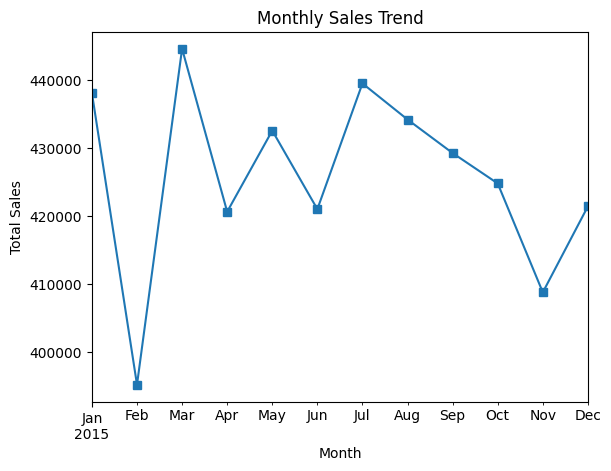

In [26]:
import matplotlib.pyplot as plt
monthly_sales.plot(kind='line', marker='s')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [31]:
#What is the highest single transaction amount recorded?
highest= df[df['t_amt'] == df['t_amt'].max()]
highest

,t_date,cust_id,t_amt,services,products_used,city,state,t_details,month,year_month
36291,2015-06-23,4005620,200.0,Exercise & Fitness,Stopwatches,Gilbert,Arizona,credit,2015-06,2015-06


In [44]:
# what service category contributes the most to total revenue?
df.groupby('services')['t_amt'].sum().agg(['idxmax','max'])

idxmax    Outdoor Recreation
max                846678.64
Name: t_amt, dtype: object

In [47]:
#Which product generated the highest revenue?
df.groupby('products_used')['t_amt'].sum().idxmax()


'Yoga & Pilates'

In [49]:
#How does the average transaction amount vary between services?
avg_by_service = df.groupby('services')['t_amt'].mean()
avg_by_service

services
Air Sports                103.455104
Combat Sports             101.061761
Dancing                   102.907512
Exercise & Fitness        103.660247
Games                     102.272968
Gymnastics                102.385901
Indoor Games              103.074684
Jumping                   102.155171
Outdoor Play Equipment    101.281196
Outdoor Recreation        100.999480
Puzzles                   100.595997
Racquet Sports            103.647461
Team Sports               102.738998
Water Sports              101.899975
Winter Sports             101.217718
Name: t_amt, dtype: float64

In [52]:
#How many unique customers made purchases?
unique_customers = df['cust_id'].nunique()
unique_customers

9926

In [58]:

# Which customers have spent the most overall?
g = df.groupby('cust_id')['t_amt'].sum()
print(f"{g.idxmax()} - {g.max()}")

4009485 - 1973.3


In [64]:
#What is the average number of transactions per customer?
avg_transactions = df.groupby('cust_id')['t_amt'].mean()
avg_transactions

cust_id
4000000    127.444000
4000001    108.945556
4000002     56.165000
4000003    123.670000
4000004    168.135000
              ...    
4009995     65.018571
4009996    104.515000
4009997    121.547500
4009998    110.950000
4009999     85.252500
Name: t_amt, Length: 9926, dtype: float64

In [66]:
#Are there customers who made multiple purchases in different categories?

customer_categories = df.groupby('cust_id')['services'].unique()
customer_categories


cust_id
4000000    [Indoor Games, Games, Outdoor Recreation, Wint...
4000001    [Games, Outdoor Play Equipment, Racquet Sports...
4000002                            [Team Sports, Gymnastics]
4000003    [Outdoor Recreation, Exercise & Fitness, Team ...
4000004                   [Winter Sports, Gymnastics, Games]
                                 ...                        
4009995    [Games, Indoor Games, Water Sports, Outdoor Re...
4009996    [Exercise & Fitness, Games, Water Sports, Outd...
4009997    [Exercise & Fitness, Team Sports, Games, Outdo...
4009998    [Gymnastics, Outdoor Recreation, Water Sports,...
4009999    [Water Sports, Outdoor Play Equipment, Outdoor...
Name: services, Length: 9926, dtype: object

In [67]:
#What percentage of customers are repeat buyers?
transactions_per_customer = df.groupby('cust_id').size()
repeat_buyers = (transactions_per_customer > 1).sum()
total_customers = transactions_per_customer.count()
repeat_percentage = (repeat_buyers / total_customers) * 100

In [68]:
repeat_percentage

np.float64(96.5645778762845)

In [71]:
#Which product category has the highest total sales?
g = df.groupby('products_used')['t_amt'].sum(); print(f"{g.idxmax()} - {g.max()}")

Yoga & Pilates - 47804.94


In [72]:
#Which services are most popular by transaction count?
s = df['services'].value_counts(); print(f"{s.idxmax()} - {s.max()}")

Outdoor Recreation - 8383


In [75]:
#For each service, which product type is purchased most frequently?

counts = df.groupby(['services','products_used']).size().reset_index(name='count')
top_products = counts.loc[counts.groupby('services')['count'].idxmax()]
top_products


,services,products_used,count
2,Air Sports,Parachutes,400
3,Combat Sports,Boxing,431
7,Dancing,Ballet Bars,414
9,Exercise & Fitness,Cardio Machine Accessories,445
32,Games,Mahjong,437
35,Gymnastics,Balance Beams,425
47,Indoor Games,Foosball,422
54,Jumping,Trampolines,421
60,Outdoor Play Equipment,Swing Sets,464
73,Outdoor Recreation,Lawn Games,466


In [79]:
#What is the average transaction amount per product type?
avg_per_product = df.groupby('products_used')['t_amt'].mean()
avg_per_product

products_used
Abdominal Equipment    105.362798
Air Hockey             103.775478
Air Suits              101.421832
Archery                 97.345564
Badminton              108.441138
                          ...    
Wetsuits               102.042775
Whitewater Rafting     102.877744
Windsurfing            104.161453
Wrestling               97.895364
Yoga & Pilates         107.668784
Name: t_amt, Length: 125, dtype: float64

In [82]:
#Are there specific services where customers spend significantly more?
service_avg = df.groupby('services')['t_amt'].mean()
service_avg.sort_values(ascending=False)

services
Exercise & Fitness        103.660247
Racquet Sports            103.647461
Air Sports                103.455104
Indoor Games              103.074684
Dancing                   102.907512
Team Sports               102.738998
Gymnastics                102.385901
Games                     102.272968
Jumping                   102.155171
Water Sports              101.899975
Outdoor Play Equipment    101.281196
Winter Sports             101.217718
Combat Sports             101.061761
Outdoor Recreation        100.999480
Puzzles                   100.595997
Name: t_amt, dtype: float64

In [83]:
#which state has the highest total sales?
g = df.groupby('state')['t_amt'].sum(); print(f"{g.idxmax()} - {g.max()}")



California - 702346.23


In [84]:
#Which city records the highest number of transactions?

c = df['city'].value_counts(); print(f"{c.idxmax()} - {c.max()}")

c

Pasadena - 939


city
Pasadena            939
Columbia            920
Kansas City         912
Columbus            906
Buffalo             507
                   ... 
Austin              410
West Valley City    409
Gilbert             400
Green Bay           231
Birmingham          214
Name: count, Length: 108, dtype: int64

In [85]:
#What verage spending per transaction in each state?
avg_state_spend = df.groupby('state')['t_amt'].mean()
avg_state_spend

state
Alabama                 102.487049
Arizona                 102.172241
California              102.652182
Colorado                101.537415
Connecticut              99.982108
District of Columbia    103.800334
Florida                 103.136567
Georgia                 102.330675
Hawaii                  101.536667
Idaho                    98.969538
Illinois                100.166315
Indiana                 100.712664
Iowa                    103.100727
Kansas                  101.436926
Kentucky                104.130392
Louisiana               103.466335
Maryland                100.506913
Massachusetts           104.541571
Michigan                101.547777
Minnesota               103.465157
Mississippi             101.214926
Missouri                100.969040
Nebraska                101.955690
Nevada                  105.434718
New Jersey              103.438005
New York                100.259452
North Carolina          103.033172
Ohio                    101.350817
Oklahoma      

In [87]:
#Are certain services more popular in specific states?

counts = df.groupby(['state','services']).size().reset_index(name='count')
top_services = counts.loc[counts.groupby('state')['count'].idxmax()]
top_services

,state,services,count
9,Alabama,Outdoor Recreation,191
24,Arizona,Outdoor Recreation,247
39,California,Outdoor Recreation,1188
54,Colorado,Outdoor Recreation,279
69,Connecticut,Outdoor Recreation,140
78,District of Columbia,Exercise & Fitness,78
99,Florida,Outdoor Recreation,483
114,Georgia,Outdoor Recreation,153
129,Hawaii,Outdoor Recreation,72
144,Idaho,Outdoor Recreation,81


In [91]:
#Which states buy the most Outdoor Recreation products?
outdoor = df[df['products_used'] == 'Outdoor Recreation']
outdoor.groupby('state')['t_amt'].sum().sort_values(ascending=False)

Series([], Name: t_amt, dtype: float64)

In [93]:
#Compare average spending between California and Texas customers.

ca = df[df['state']=='California']['t_amt'].mean()
tx = df[df['state']=='Texas']['t_amt'].mean()
print(f"California: {ca} | Texas: {tx}")

California: 102.65218211049401 | Texas: 101.37989136542423


In [96]:
#Which quarter of the year saw the highest sales?
df['t_date'] = pd.to_datetime(df['t_date'], errors='coerce')
df['quarter'] = df['t_date'].dt.to_period('Q')
quarter_sales = df.groupby('quarter')['t_amt'].sum()
quarter_sales




quarter
2015Q1    1278092.37
2015Q2    1274397.37
2015Q3    1303137.44
2015Q4    1255193.36
Freq: Q-DEC, Name: t_amt, dtype: float64

In [97]:
#How does total sales vary month by month?
monthly_sales = df.groupby('year_month')['t_amt'].sum()
monthly_sales

year_month
2015-01    438165.76
2015-02    395262.37
2015-03    444664.24
2015-04    420695.24
2015-05    432627.58
2015-06    421074.55
2015-07    439560.80
2015-08    434255.01
2015-09    429321.63
2015-10    424856.28
2015-11    408846.35
2015-12    421490.73
Freq: M, Name: t_amt, dtype: float64

In [99]:
#What is the total number of transactions per month?

monthly_transactions = df.groupby('year_month').size()
monthly_transactions

year_month
2015-01    4268
2015-02    3834
2015-03    4360
2015-04    4175
2015-05    4205
2015-06    4171
2015-07    4252
2015-08    4250
2015-09    4160
2015-10    4181
2015-11    3994
2015-12    4150
Freq: M, dtype: int64

In [104]:
#How many transactions were done using credit?
credit_transactions = (df['t_details'] == 'Credit').count()
credit_transactions

np.int64(50000)

In [105]:
#What is the total revenue generated from credit transactions?
redit_revenue = df.loc[df['t_details'] == 'Credit', 't_amt'].sum()
redit_revenue

np.float64(0.0)

In [106]:
#Is there a difference in average spending between credit and debit customers?
c = df[df['t_details']=='Credit']['t_amt'].mean()
d = df[df['t_details']=='Debit']['t_amt'].mean()
print(f"Credit: {c} | Debit: {d}")

Credit: nan | Debit: nan


In [107]:
#Which states or cities should the company focus on for marketing high-value products?

high_value_states = df.groupby('state')['t_amt'].mean().sort_values(ascending=False)
print(high_value_states.head(10))
high_value_cities = df.groupby('city')['t_amt'].mean().sort_values(ascending=False)
print(high_value_cities.head(10))
location_strength = df.groupby('state').agg(
    total_revenue=('t_amt','sum'),
    avg_value=('t_amt','mean'),
    transactions=('t_amt','count')
).sort_values(['avg_value','total_revenue'], ascending=False)

print(location_strength.head(10))


state
Nevada                  105.434718
Oklahoma                104.995771
Virginia                104.976206
Massachusetts           104.541571
Utah                    104.507560
Kentucky                104.130392
District of Columbia    103.800334
South Carolina          103.540065
Louisiana               103.466335
Minnesota               103.465157
Name: t_amt, dtype: float64
city
Long Beach      109.308506
Boston          107.975107
Louisville      106.643184
Paterson        106.629200
Irvine          106.517384
Cincinnati      106.356258
Alexandria      106.010605
Huntsville      105.721088
Las Vegas       105.594841
Miami           105.569240
Name: t_amt, dtype: float64
                      total_revenue   avg_value  transactions
state                                                        
Nevada                     95418.42  105.434718           905
Oklahoma                   47668.08  104.995771           454
Virginia                  144447.26  104.976206          1376
Mas

In [110]:
#Should more inventory be stocked for Exercise & Fitness products given their popularity?

fitness_count = df[df['products_used']=='Exercise & Fitness'].shape[0]
total_count = df.shape[0]
fitness_revenue = df[df['products_used']=='Exercise & Fitness']['t_amt'].sum()
total_revenue = df['t_amt'].sum()
fitness_avg = df[df['products_used']=='Exercise & Fitness']['t_amt'].mean()
overall_avg = df['t_amt'].mean()
fitness_avg
overall_avg

np.float64(102.2164108)

In [111]:
#Are there product categories with high sales but low average transaction amounts?
category_stats = df.groupby('products_used').agg(
    total_sales=('t_amt','sum'),
    avg_value=('t_amt','mean'),
    transactions=('t_amt','count')
)

print(category_stats.sort_values('total_sales', ascending=False))
high_sales_low_value = category_stats[
    (category_stats['total_sales'] > category_stats['total_sales'].median()) &
    (category_stats['avg_value'] < category_stats['avg_value'].median())
]

print(high_sales_low_value)

                            total_sales   avg_value  transactions
products_used                                                    
Yoga & Pilates                 47804.94  107.668784           444
Swing Sets                     47204.14  101.733060           464
Lawn Games                     46828.44  100.490215           466
Golf                           46577.68  103.047965           452
Cardio Machine Accessories     46485.54  104.461888           445
...                                 ...         ...           ...
Tetherball                     35611.93   95.989030           371
Surfing                        35069.08   99.065198           354
Disc Golf                      33944.02   95.081289           357
Mechanical Puzzles             20381.67   94.798465           215
Air Suits                      19371.57  101.421832           191

[125 rows x 3 columns]
                            total_sales   avg_value  transactions
products_used                                       

In [112]:
#Are there underperforming service categories that need promotional offers?
service_perf = df.groupby('services').agg(
    total_revenue=('t_amt','sum'),
    avg_value=('t_amt','mean'),
    transactions=('t_amt','count')
)

print(service_perf.sort_values('total_revenue'))
underperforming = service_perf[
    (service_perf['total_revenue'] < service_perf['total_revenue'].median()) &
    (service_perf['transactions'] < service_perf['transactions'].median())
]

print(underperforming)

                        total_revenue   avg_value  transactions
services                                                       
Dancing                      42603.71  102.907512           414
Puzzles                      61564.75  100.595997           612
Air Sports                   99316.90  103.455104           960
Combat Sports               164730.67  101.061761          1630
Racquet Sports              166976.06  103.647461          1611
Jumping                     205842.67  102.155171          2015
Indoor Games                288506.04  103.074684          2799
Outdoor Play Equipment      294728.28  101.281196          2910
Winter Sports               321973.56  101.217718          3181
Gymnastics                  327225.34  102.385901          3196
Games                       374932.70  102.272968          3666
Water Sports                531815.97  101.899975          5219
Team Sports                 617461.38  102.738998          6010
Exercise & Fitness          766463.87  1